#### <font color='red'>LOGISTIC REGRESSION -classification

* logistic regression is a supervised machine learning algorithm used for classification tasks,especially binary classification(where the output is one of two possible outcomes,like "yes/no","true/false","0/1").

* logistic regression predicts the probability that a given input belongs to a particular class.instead of giving a continuous output like linear regression it gives an output between 0 and 1 using a "sigmoid function".

<font color='blue'>examples:
* to predict whether an email is spam(1) or (0)
* whether the tumor is malignant(1) or not (0)

##### <font color='red'>Why do we use logistic regression
* to predict categorical outcomes
* it's simple,fast,and interpretable.
* grest as a baseline model before trying more complex algorithms.

<font color='darkbrown'> Where do we use logistic regression
* Email spam detection-(spam or not spam)
* Medical diagnosis-(disease or No disease)
* Credit risk-(will default or not)
* Employee attrition prediction-(yes or no)
* Marketing-(Will buy product or not)

  

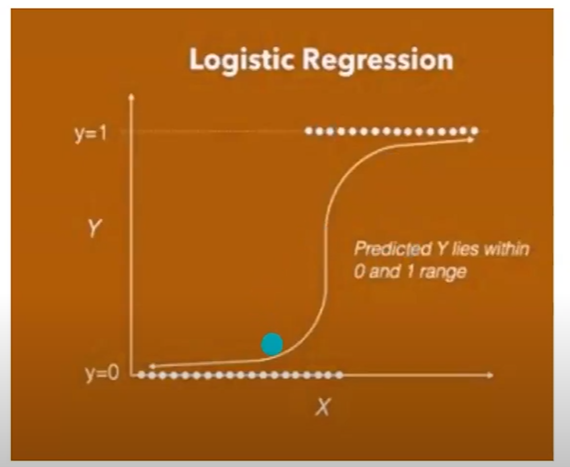

In [14]:
#logistic regression applying to binary classifiaction
from PIL import Image
Image.open('lr-1.png')


# we have consider sigmoid function(y) >0.5 - class(1)
# we have consider sigmoid function(y) <0.5 - class(0)


### <font color='dark Blue'> Working process of LOgistic Regression
* - Steps:
 * step - 1. Take the input features(x) 
 * step - 2. apply a linear combination(weighted sum)
   - --> each feature is multiplied by a weight,and a bias(intercept) is added: z(this is linear regression)
 * step - 3. Apply the sigmoid(logistic)function
   - -->the linear result z is passed into the sigmoid function to convert it into a probability:
   - this maps any real number into a value between 0 and 1,which we interpret as probability.
  * step - 4.make predictions(0 or 1)
    - if the probability >0.5-->class 1 -('yes')
    - if the probability <=0.5--> class 0 -('no')
    - you can change the threshold(0.5) based on your use case.
   
  * step - 5.Calculate loss using log loss(cross entropy)
    - the algorithm checks how far the predicted probability is from the actual label using cross-entropy loss:
    - this loss is small when prediction is close to the real label,and large ortherwise.
   * step - 6.Optimize weights using Gradient Descent
     - the algorithm updates the weights and bias to reduce the loss using gradient descent(an optimization technique).
     - this repeats for many iteration(epochs) until model becomes accurate. 

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
df=pd.read_csv('creditcard.csv')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [22]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [14]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [16]:
df.shape

(284807, 31)

#### handle class imbalance using smote:
* credit card fraud dataset:
* 1.most transactions are non-fraudulent (class=0)
* 2.very few are fraudulent (class=1)
- * note: this imbalance can mislead the model to always predict "non-fraud"

In [25]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


In [27]:
#split features and target
x=df.drop('Class',axis=1)
y=df['Class']

In [29]:
#apply smote before splitting
smote=SMOTE(random_state=42)
x_resampled,y_resampled=smote.fit_resample(x,y)

In [31]:
#split into train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_resampled,y_resampled,test_size=0.2,random_state=42)

In [37]:
pd.Series(y_resampled.value_counts())

Class
0    284315
1    284315
Name: count, dtype: int64

##### Feature scaling(standardscaler)
* most features in the credit card fraud dataset are already scaled,but if you are using logistic regression,it's best to standardize the data.


In [40]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

#### train-test split
* we alredy did this earlier in the process before scaling,but to recap

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [53]:
x_train.shape

(227845, 30)

In [55]:
x_test.shape

(56962, 30)

In [57]:
y_train.shape

(227845,)

In [59]:
y_test.shape

(56962,)

#### Train Logistic Regression model

In [66]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(x_train_scaled,y_train)

LogisticRegression()

In [68]:
y_pred=model.predict(x_test_scaled)
y_pred[:10]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

#### Evaluate the model
* Accuracy-overall correctness of the model
* precision-out of predicted frauds,how many were correct
* recall-out of actual frauds,how many were caught
* f1-score-balance between precision and recall

In [75]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
y_pred=model.predict(x_test_scaled)

accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)

print(f"Accuracy:{accuracy:.4f}")
print(f"Precision:{precision:.4f}")
print(f"Recall:{recall:.4f}")
print(f"F1 Score:{f1:.4f}")


Accuracy:0.9991
Precision:0.8462
Recall:0.5612
F1 Score:0.6748


### Confusion matrix
* how many fradulent transactions were correctly identified(true positives)
* how many normal transaction were wrongly marked as fraud(false positives),
* and other misclassifications.

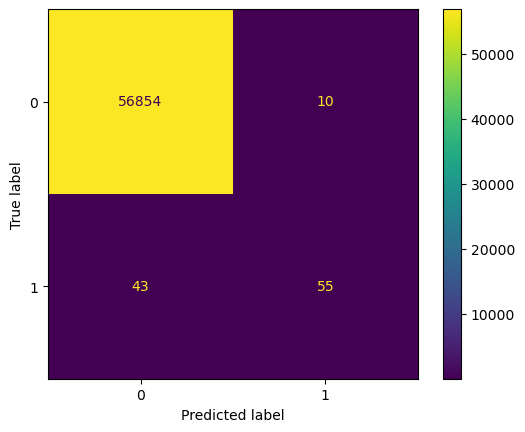

In [79]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

cm=confusion_matrix(y_test,y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()